In [2]:
import tensorflow as tf
from tensorflow.keras import datasets , layers , models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#Load cifar 10  and split it .
(x_train,y_train),(x_test,y_test) = datasets.cifar10.load_data()

In [4]:
print("Train samples:", x_train.shape, y_train.shape)
print("Test samples:", x_test.shape, y_test.shape)

Train samples: (50000, 32, 32, 3) (50000, 1)
Test samples: (10000, 32, 32, 3) (10000, 1)


In [5]:
# Sampleof given image data :
labels=['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

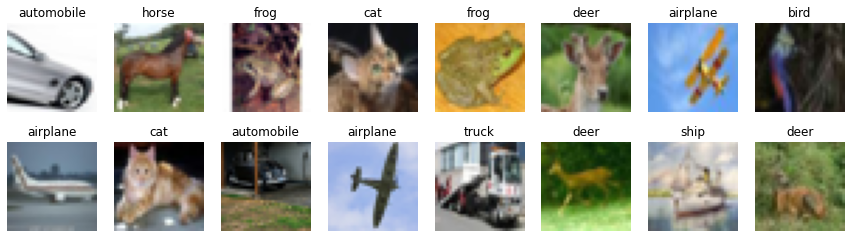

In [6]:
# show random images from train
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 2.5 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_train))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(x_train[random_index, :])
        ax.set_title(labels[y_train[random_index, 0]])
plt.show()

In [7]:
# normalize inputs
x_train = (x_train / 255)
x_test = (x_test / 255) 
# convert class labels to one-hot encoded, should have shape (?, NUM_CLASSES)
y_train = y_train.flatten()
y_test = y_test.flatten()

# Define CNN architecture

In [8]:
cnn = models.Sequential([
    #2 conv + pooling
    layers.Conv2D(filters=3,kernel_size=(3,3),padding="same",activation="relu",input_shape=(32,32,3)),
    layers.Conv2D(filters=32,kernel_size=(3,3),padding="same",activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.2),
     #2 conv + pooling
    layers.Conv2D(filters=64,kernel_size=(3,3),padding="same",activation="relu"),
    layers.Conv2D(filters=128,kernel_size=(3,3),padding="same",activation="relu"),
    layers.MaxPooling2D((2,2)),
    #2 conv + pooling
    layers.Conv2D(filters=128,kernel_size=(3,3),padding="same",activation="relu"),
    layers.Conv2D(filters=256,kernel_size=(3,3),padding="same",activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.2),
    
    #dence
    layers.Flatten (),
    layers.Dense ( 128 , activation = "relu"),
    layers.Dense ( 64 , activation = "relu"),
    layers.Dropout(0.5),
    layers.Dense ( 10   , activation = "softmax")
])

In [9]:
# describe model
cnn.compile(optimizer="adam",
            loss="sparse_categorical_crossentropy",
            metrics=["accuracy"])
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 3)         84        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0

In [ ]:
hist=cnn.fit(x_train , y_train,validation_data=(x_test, y_test) , epochs=10)

In [17]:
test_loss, test_accuracy = cnn.evaluate(x_test, y_test)
print("Test accuracy: {:0.2f} %".format(test_accuracy * 100))


313/313 [==============================] - 1s 3ms/step - loss: 0.7361 - accuracy: 0.7595
Test accuracy: 75.95 %


In [21]:
# make test predictions
y_pred_test = cnn.predict(x_test)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)
y_pred_test_max_probas = np.max(y_pred_test, axis=1)

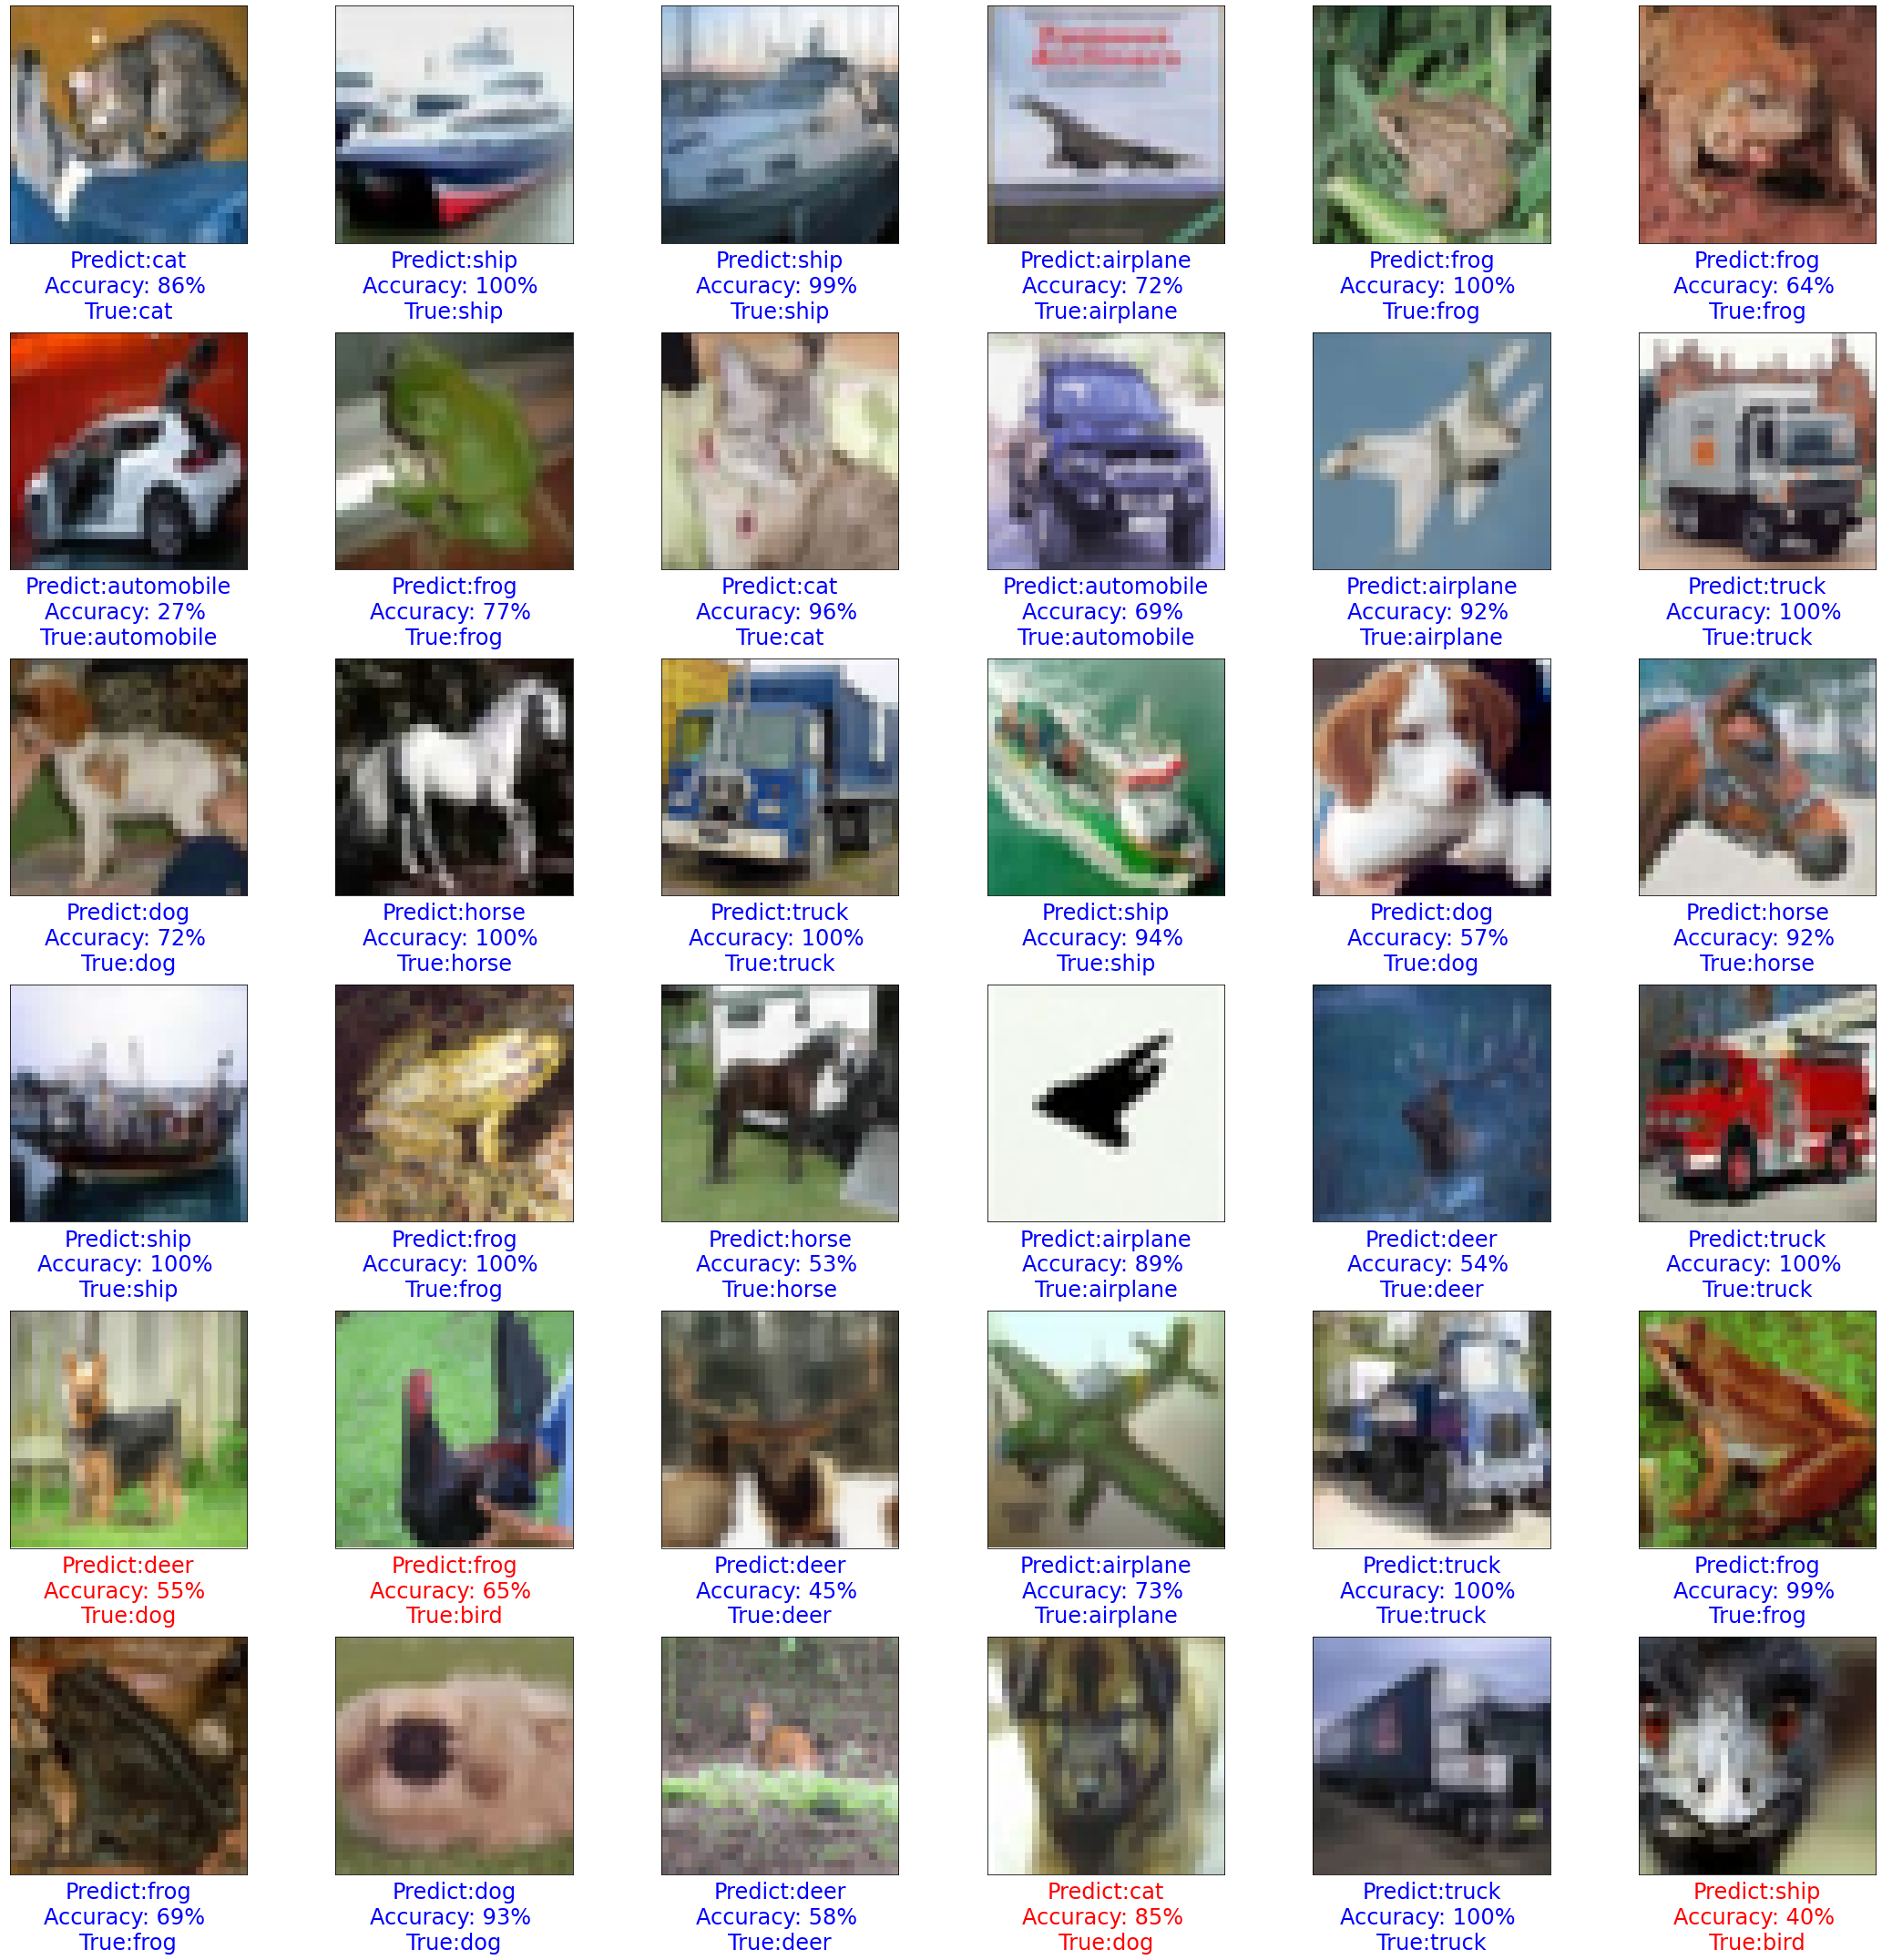

In [22]:
def plot_sample(i,predic_array,true_lables,images):
    predic_array,true_lable ,img = predic_array[i],true_lables[i],images[i]
    
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img)
    prediced_label = np.argmax(predic_array)
    if prediced_label == true_lable:
        
       # print(F"{predic_label}=={true_lable}")
        color="blue"
    else: 
        #print(F"{predic_label}!={true_lable}")
        color="red"
        
    plt.xlabel(f"Predict:{labels[prediced_label]}\nAccuracy: {100*np.max(predic_array):2.0f}% \nTrue:{labels[true_lable]}",size=24,color=color)
        
        
row = 6
column = 6
images = row * column
plt.figure(figsize = (5 * row,5 * column))
test_images =x_test[:images] 
test_lables =y_test[:images]
predictions = cnn.predict(test_images)
for i in range(images):
    plt.subplot(row,column ,i+1)
    #print(test_lables[i])
    plot_sample(i,predictions,test_lables,test_images)
    

plt.tight_layout()
plt.show()